
image 1/1 c:\Users\katri\OneDrive\Documents\DSP\dspPython\a.jpg: 1280x960 1 Plate-Number, 633.4ms
Speed: 48.2ms preprocess, 633.4ms inference, 17.1ms postprocess per image at shape (1, 3, 1280, 960)


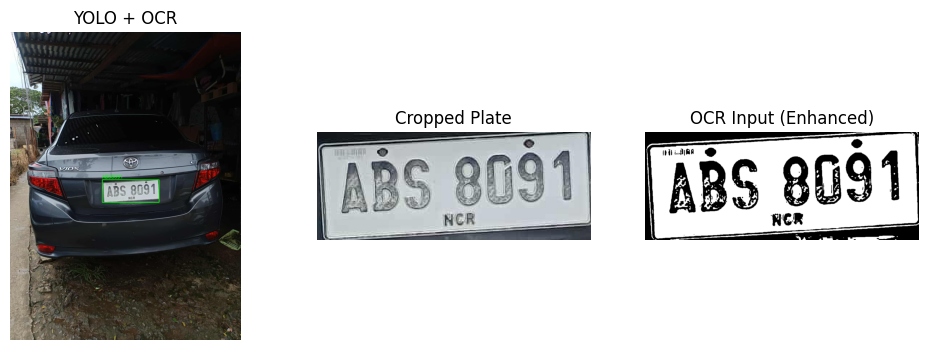

Extracted Plate Number: ABS8091


In [281]:
from ultralytics import YOLO
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Path to Tesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load YOLO trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Image path
image_path = "a.jpg"

# Run YOLO detection (lower conf so it always detects)
results = model.predict(image_path, conf=0.02, imgsz=1280, iou=0.3)

# Load image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plate_number = ""

# Take detections
for result in results:
    for box in result.boxes:   # loop (in case YOLO finds more than one, but you’ll only keep one)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        roi = img[y1:y2, x1:x2]

        # --- Preprocess for OCR ---
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

        # Boost faint characters
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        gray = clahe.apply(gray)

        # Denoise + Threshold
        gray = cv2.medianBlur(gray, 3)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # OCR with Tesseract
        config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        text = pytesseract.image_to_string(thresh, config=config).strip()
        plate_number = text

        # Draw results
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)
        cv2.putText(img_rgb, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

        # Show debug views
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(img_rgb)
        plt.title("YOLO + OCR")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Plate")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(thresh, cmap="gray")
        plt.title("OCR Input (Enhanced)")
        plt.axis("off")
        plt.show()

        break   # only take first plate

if plate_number:
    print("Extracted Plate Number:", plate_number)
else:
    print("No plate detected.")


In [282]:
from ultralytics import YOLO

# Load model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run with lower conf + larger image size
results = model.predict("a.jpg", conf=0.02, imgsz=1280, iou=0.3)

# Show detection
results[0].show()



image 1/1 c:\Users\katri\OneDrive\Documents\DSP\dspPython\a.jpg: 1280x960 1 Plate-Number, 331.5ms
Speed: 17.3ms preprocess, 331.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1280, 960)


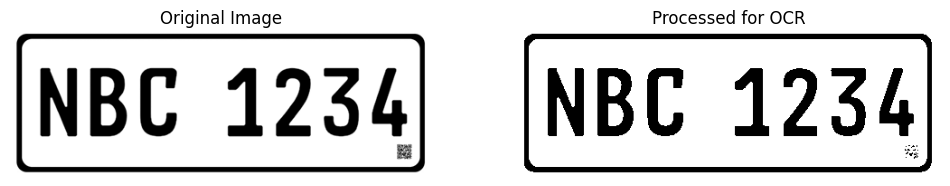

Extracted Text:
 NBC 1234



In [238]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# --- OPTIONAL: If tesseract is not in PATH, set the path manually ---
# For Windows, uncomment and adjust:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def ocr_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 80, 170, cv2.THRESH_BINARY)

    # Morphological noise removal
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # OCR with Tesseract
    text = pytesseract.image_to_string(cleaned)

    # Show original and processed image inline (Jupyter)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    axs[1].imshow(cleaned, cmap="gray")
    axs[1].set_title("Processed for OCR")
    axs[1].axis("off")

    plt.show()

    return text


text_output = ocr_image("plate.png")
print("Extracted Text:\n", text_output)

In [121]:
pip install  pytesseract

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!yolo detect train data="Car-1/data.yaml" model=yolov8n.pt epochs=50 imgsz=640


New https://pypi.org/project/ultralytics/8.3.203 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.202  Python-3.13.1 torch-2.8.0+cpu CPU (11th Gen Intel Core i3-1115G4 @ 3.00GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Car-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None

In [60]:
model = YOLO("runs/detect/train3/weights/best.pt")  

In [54]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

In [53]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
